## Problem Statement:

Using machine learning, we should be able to predict the images on the new set of
data using the model that we have trained on the existing data by reducing the 8x8 pixels provided in the dataset using PCA.


### PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique used in data analysis and machine learning. It is used to extract the underlying structure in a large set of possibly correlated variables, and to represent this structure in a smaller set of uncorrelated variables called principal components.

PCA works by transforming the data into a new coordinate system, where the first principal component has the highest variance, the second principal component has the second-highest variance, and so on. By retaining only the first few principal components, PCA effectively compresses the information in the original data into a lower-dimensional representation.

PCA is commonly used for data visualization, to identify patterns and correlations in the data, to reduce the dimensionality of the data for use in machine learning algorithms, and for feature extraction. It is a useful tool for exploring and understanding high-dimensional datasets, and can be applied to a variety of data types, including images, text, and numerical data.

### Dataset Information:

We will import dataset from sklearn library.

|      |      |
|------|-----|
|Classes| 10|
Samples per class |~180
Samples total | 1797
Dimensionality | 64
Features integers | 0-16

#### Importing Dataset

In [3]:
import numpy as np
import math
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
#dir(datasets)

##### Importing digits dataset from inbuilt datasets in sklearn package

In [5]:
from sklearn.datasets import load_digits

In [36]:
digits = load_digits()

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [35]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df['target']= digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Visualization

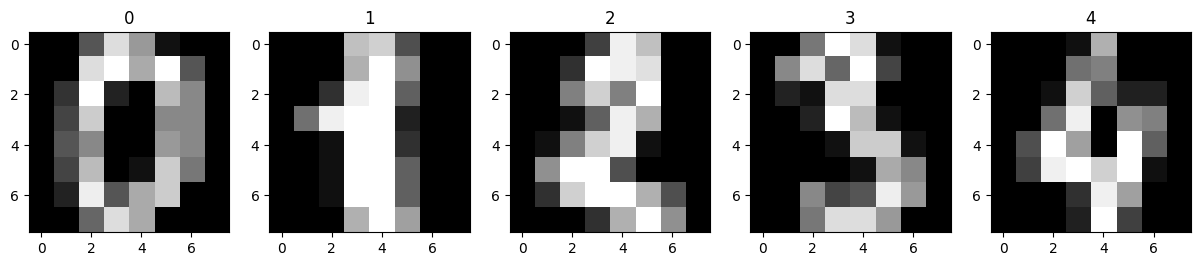

In [9]:
plt.figure(figsize = (15,3))
for index, (image, label) in enumerate(zip(digits.data[:5],digits.target[:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap= plt.cm.gray)
    plt.title(label)

plt.show()

In [10]:
x = df.drop(columns='target')
y=df.target

In [11]:
x.shape

(1797, 64)

### Normalizating Independent Features

In [37]:
x_ss = StandardScaler().fit_transform(x)

### Selecting PCA components using Cululative Explained Variance 

In [13]:
x1= x.T

In [14]:
x1.shape

(64, 1797)

In [40]:
cov_mat = np.cov(x.T) #covariance matrix is a square matrix giving the covariance between 
                    #each pair of elements of a given random vector

In [16]:
eig_val, eig_vec = np.linalg.eig(cov_mat) #eigenvalues and eigen vectors

In [44]:
#explained variance
tot = sum(eig_val)
var_exp = [(i/tot)*100 for i in sorted(eig_val,reverse= True)] #individual explained variance
var_exp[:20]

[14.89059358406383,
 13.618771239635445,
 11.794593763975769,
 8.409979421009202,
 5.782414664005543,
 4.916910317124013,
 4.315987010825769,
 3.6613725770840553,
 3.353248097967144,
 3.078806208904547,
 2.3723408440031006,
 2.2726965688095566,
 1.8218633129951922,
 1.7738549371819072,
 1.4671010927893096,
 1.409715601608705,
 1.318589200727425,
 1.2481378178255575,
 1.017717960321567,
 0.9056174389949903]

Inference: We note that the difference between explained variance of each principal component keeps on reducing.

In [39]:
#cumulative explained variance
cum_var = np.cumsum(var_exp)

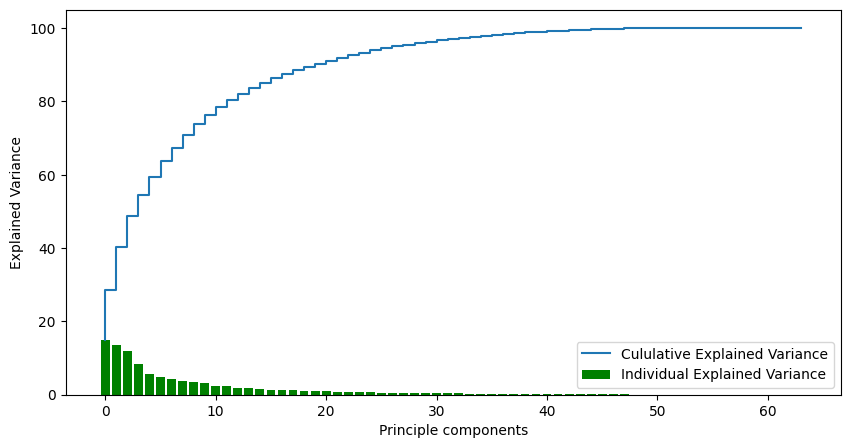

In [21]:
plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)),var_exp, label= 'Individual Explained Variance', color = 'g')
plt.step(range(len(cum_var)), cum_var, label='Cululative Explained Variance')
plt.ylabel('Explained Variance')
plt.xlabel('Principle components')
plt.legend()
plt.show()

Inference:\
We can observe from the above graph that components from 20-33 give an acceptable relation between the independent variables there we will build a model which will compare the variance of different number of components supplied to PCA.

##### Splitting Dataset

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_ss, y,test_size=0.2, random_state=40)

### Applying PCA and Decision Tree

In [23]:
PCA_comp = []
Accuracy_Score = []
for i in range(20,33):
    pca_obj = PCA(n_components=i)
    x_train_pca = pca_obj.fit_transform(x_train)
    x_test_pca = pca_obj.transform(x_test)
    dtc.fit(x_train_pca,y_train) #decision tree 
    y_pred=dtc.predict(x_test_pca)
    PCA_comp.append(i)
    Accuracy_Score.append(accuracy_score(y_test,y_pred))

In [24]:
acc_df = pd.DataFrame([PCA_comp,Accuracy_Score], index=['PCA_components','Accuracy_Score'])
acc_df=acc_df.T
acc_df.PCA_components=acc_df.PCA_components.astype(int)
acc_df.Accuracy_Score=acc_df.Accuracy_Score.round(3)
acc_df

,PCA_components,Accuracy_Score
0,20,0.836
1,21,0.836
2,22,0.833
3,23,0.817
4,24,0.817
5,25,0.819
6,26,0.825
7,27,0.806
8,28,0.831
9,29,0.819


In [46]:
x_train_pca[:,0]

array([-0.72958408,  1.02620636,  0.58073614, ...,  0.64520445,
       -2.72655443, -3.23191789])

In [48]:
x_train_pca[:,1]

array([ 0.24283488, -4.39488443,  1.18607453, ...,  5.43626668,
        2.35911118, -0.68710177])

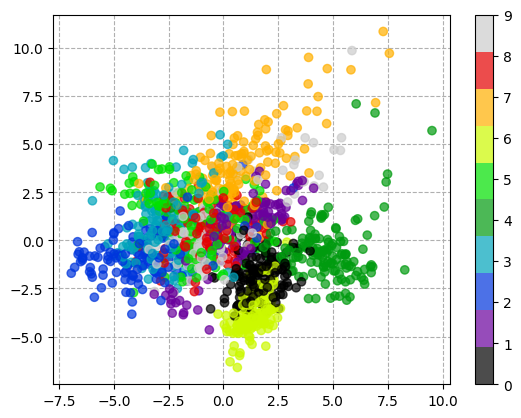

In [83]:
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train,alpha=0.7,
           cmap=plt.cm.get_cmap("nipy_spectral",10),zorder=2) 
#zorder decides which layer the graph shall appear, here to make it above the grid
#for zorder https://matplotlib.org/3.1.1/gallery/misc/zorder_demo.html
plt.colorbar()
plt.grid(linestyle='dashed')
plt.show()

### Inference:

As we observe the accuracy acore is not constant and changes on refreshing the model however an accuracy of approximately 85% is 
achieved when the components around 25 which is still better than 64 components.

In [25]:
print("Max Accuracy score :")
acc_df[acc_df['Accuracy_Score'] == max(acc_df['Accuracy_Score'])]

Max Accuracy score :


,PCA_components,Accuracy_Score
12,32,0.844


In [26]:
#taking PCA n_components = 22
x1_train, x1_test, y1_train, y1_test = train_test_split(x_ss, y,test_size=0.2, random_state=40)

pca_obj = PCA(n_components=22)
x1_train_pca = pca_obj.fit_transform(x1_train)
x1_test_pca = pca_obj.transform(x1_test)
dtc.fit(x1_train_pca,y1_train) #decision tree 
y1_pred=dtc.predict(x1_test_pca)

In [27]:
np.array(y1_train)

array([9, 6, 1, ..., 7, 3, 3])

In [28]:
y1_pred

array([8, 1, 9, 0, 9, 2, 2, 7, 3, 3, 0, 4, 0, 6, 3, 6, 7, 3, 5, 0, 1, 8,
       5, 2, 0, 6, 4, 1, 7, 5, 5, 8, 9, 2, 6, 4, 8, 9, 7, 5, 5, 9, 8, 4,
       2, 2, 2, 5, 0, 0, 1, 9, 1, 9, 1, 2, 6, 4, 5, 1, 8, 8, 8, 0, 7, 6,
       5, 9, 4, 4, 3, 2, 7, 4, 7, 6, 8, 9, 5, 4, 2, 8, 9, 1, 9, 4, 3, 4,
       3, 1, 2, 9, 0, 0, 7, 1, 1, 6, 7, 0, 8, 2, 5, 6, 1, 5, 2, 1, 1, 1,
       8, 4, 4, 3, 9, 6, 6, 3, 6, 7, 1, 8, 5, 3, 6, 6, 3, 1, 1, 2, 9, 8,
       4, 9, 9, 1, 7, 7, 6, 9, 1, 6, 8, 4, 5, 8, 0, 5, 4, 9, 3, 2, 7, 9,
       4, 6, 2, 2, 8, 7, 2, 6, 6, 5, 2, 1, 2, 1, 7, 4, 3, 8, 9, 4, 1, 7,
       6, 1, 1, 0, 4, 8, 8, 1, 4, 0, 0, 1, 3, 0, 7, 3, 0, 1, 0, 3, 9, 9,
       6, 8, 8, 8, 6, 0, 1, 3, 3, 4, 7, 2, 1, 9, 8, 8, 4, 1, 6, 8, 3, 1,
       1, 3, 9, 6, 2, 3, 6, 8, 6, 6, 8, 4, 1, 8, 9, 7, 6, 3, 2, 5, 8, 3,
       3, 0, 1, 0, 0, 3, 9, 6, 6, 4, 9, 4, 3, 6, 0, 8, 1, 9, 4, 7, 7, 3,
       7, 9, 7, 6, 9, 4, 8, 7, 3, 8, 5, 7, 7, 1, 5, 3, 3, 5, 9, 8, 5, 4,
       2, 0, 4, 5, 7, 2, 7, 6, 8, 6, 8, 2, 2, 0, 3,

In [29]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.87      0.87      0.87        47
           2       0.79      0.71      0.75        38
           3       0.68      0.76      0.72        34
           4       0.91      0.82      0.86        38
           5       0.86      0.86      0.86        28
           6       0.92      0.97      0.94        34
           7       0.91      0.86      0.88        35
           8       0.60      0.67      0.63        36
           9       0.80      0.80      0.80        40

    accuracy                           0.82       360
   macro avg       0.83      0.83      0.83       360
weighted avg       0.83      0.82      0.83       360



##### Misclassified

In [30]:
misclassified = y1_pred[y1_pred!=y1_test]
misclassified

array([9, 2, 3, 3, 9, 2, 8, 5, 8, 2, 9, 9, 6, 1, 8, 3, 7, 5, 6, 3, 1, 8,
       9, 4, 8, 2, 8, 1, 3, 9, 8, 8, 6, 3, 2, 1, 8, 3, 8, 7, 8, 3, 0, 3,
       4, 8, 3, 7, 9, 8, 3, 2, 5, 2, 3, 9, 8, 8, 5, 4, 1, 8, 1])

In [31]:
len(misclassified)

63

In [32]:
#Percentage Misclassified
len(misclassified)/len(y1_test)*100

17.5

##### Without applying PCA, how much misclassified data are there?

In [33]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x_ss, y,test_size=0.2, random_state=40)
dtc.fit(x2_train,y2_train) #decision tree 
y2_pred=dtc.predict(x2_test)
len(y2_pred[y2_pred!=y2_test])

63

### Conclusion:
PCA is a very powerful technique for reducing the dimensions of the data, projecting the data from a higher dimension to a lower dimension, helps in data visualization, helps in data compression and most of all increases the model training speed drastically by decreasing the number of variables involved in computation.